# Domain Name
    1. Environment
        Air quality


# Dataset:-Air quality of an Italian city


### The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer

# Attribute Information:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in Â°C
    13 Relative Humidity (%)
    14 AH Absolute Humidity



In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor as tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [188]:
air_data = pd.read_csv('AirQualityUCI.csv')
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [189]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [190]:
#Removing unnessary columns in the data set
air_data = air_data.drop(['Unnamed: 15','Unnamed: 16'],axis =1)

In [191]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [192]:
# finding the missing or NAN values in the dataset
air_data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [193]:
#Removing the null values in the dataset
air_data.dropna(inplace = True)

In [194]:
air_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [195]:
air_data.shape

(9357, 15)

In [196]:
#Missing values are tagged with -200 value
air_data = air_data.replace(to_replace =-200.0, 
                 value =np.nan)


In [197]:
air_data['CO(GT)'].dtype

dtype('float64')

In [198]:
air_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [199]:
air_data = air_data.fillna(0)


In [267]:
air_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
hour             0
Month            0
dtype: int64

In [200]:
#Describe the data from Air quality dataset
air_data.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      1.765545  1056.813081    21.373731     9.688704     902.418296   
std       1.554264   301.246318    91.103489     7.559785     318.696890   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.600000   921.000000     0.000000     4.000000     711.000000   
50%       1.500000  1053.000000     0.000000     7.900000     895.000000   
75%       2.600000  1221.000000     0.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    203.649567    802.813188    93.245592   1399.302661   982.895052   
std     214.993187    299.356129    61.479820    441.458774   438.074058   
min       0.000000      0.000000     0.000000      0.000000     0.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean     17.601325    47.308400     0.985417  
std       9.357750    19.474603     0.442966  
min      -1.900000     0.000000     0.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [201]:
air_data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [202]:
#Split hour from time into new column
air_data['hour']=air_data['Time'].apply(lambda x: int(x.split(':')[0]))
air_data.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: hour, dtype: int64

In [203]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
hour             9357 non-null int64
dtypes: float64(13), int64(1), object(2)
memory usage: 1.2+ MB


In [204]:
air_data['Date']=pd.to_datetime(air_data['Date'], format='%m/%d/%Y')   

In [205]:
air_data['Date'].dtype

dtype('<M8[ns]')

In [206]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  hour  
0  13.6  48.9  0.7578    18  
1  13.3  47.7  0.7255    19  
2  11.9  54.0  0.7502    20  
3  11.0  60.0  0.7867    21  
4  11.2  59.6  0.7888    22

In [207]:
# we required Month as index so first we nee to set the Data as Index columns
air_data.set_index("Date", inplace = True)

In [208]:
air_data.head()

Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                           
2004-03-10  18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10  19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10  20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10  21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10  22:00:00     1.6       1272.0      51.0       6.5          836.0   

            NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
Date                                                                          
2004-03-10    166.0        1056.0    113.0        1692.0       1268.0  13.6   
2004-03-10    103.0        1174.0     92.0        1559.0        972.0  13.3   
2004-03-10    131.0        1140.0    114.0        1555.0       1074.0  11.9   
2004-03-10    172.0        1092.0    122.0        1584.0       1203.0  11.0   
2004-03-10    131.0        1205.0    116.0        1490.0       1110.0  11.2   

              RH      AH  hour  
Date                            
2004-03-10  48.9  0.7578    18  
2004-03-10  47.7  0.7255    19  
2004-03-10  54.0  0.7502    20  
2004-03-10  60.0  0.7867    21  
2004-03-10  59.6  0.7888    22

In [209]:
air_data['Month']=air_data.index.month     
air_data.reset_index(inplace=True)


In [210]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  hour  Month  
0  13.6  48.9  0.7578    18      3  
1  13.3  47.7  0.7255    19      3  
2  11.9  54.0  0.7502    20      3  
3  11.0  60.0  0.7867    21      3  
4  11.2  59.6  0.7888    22      3

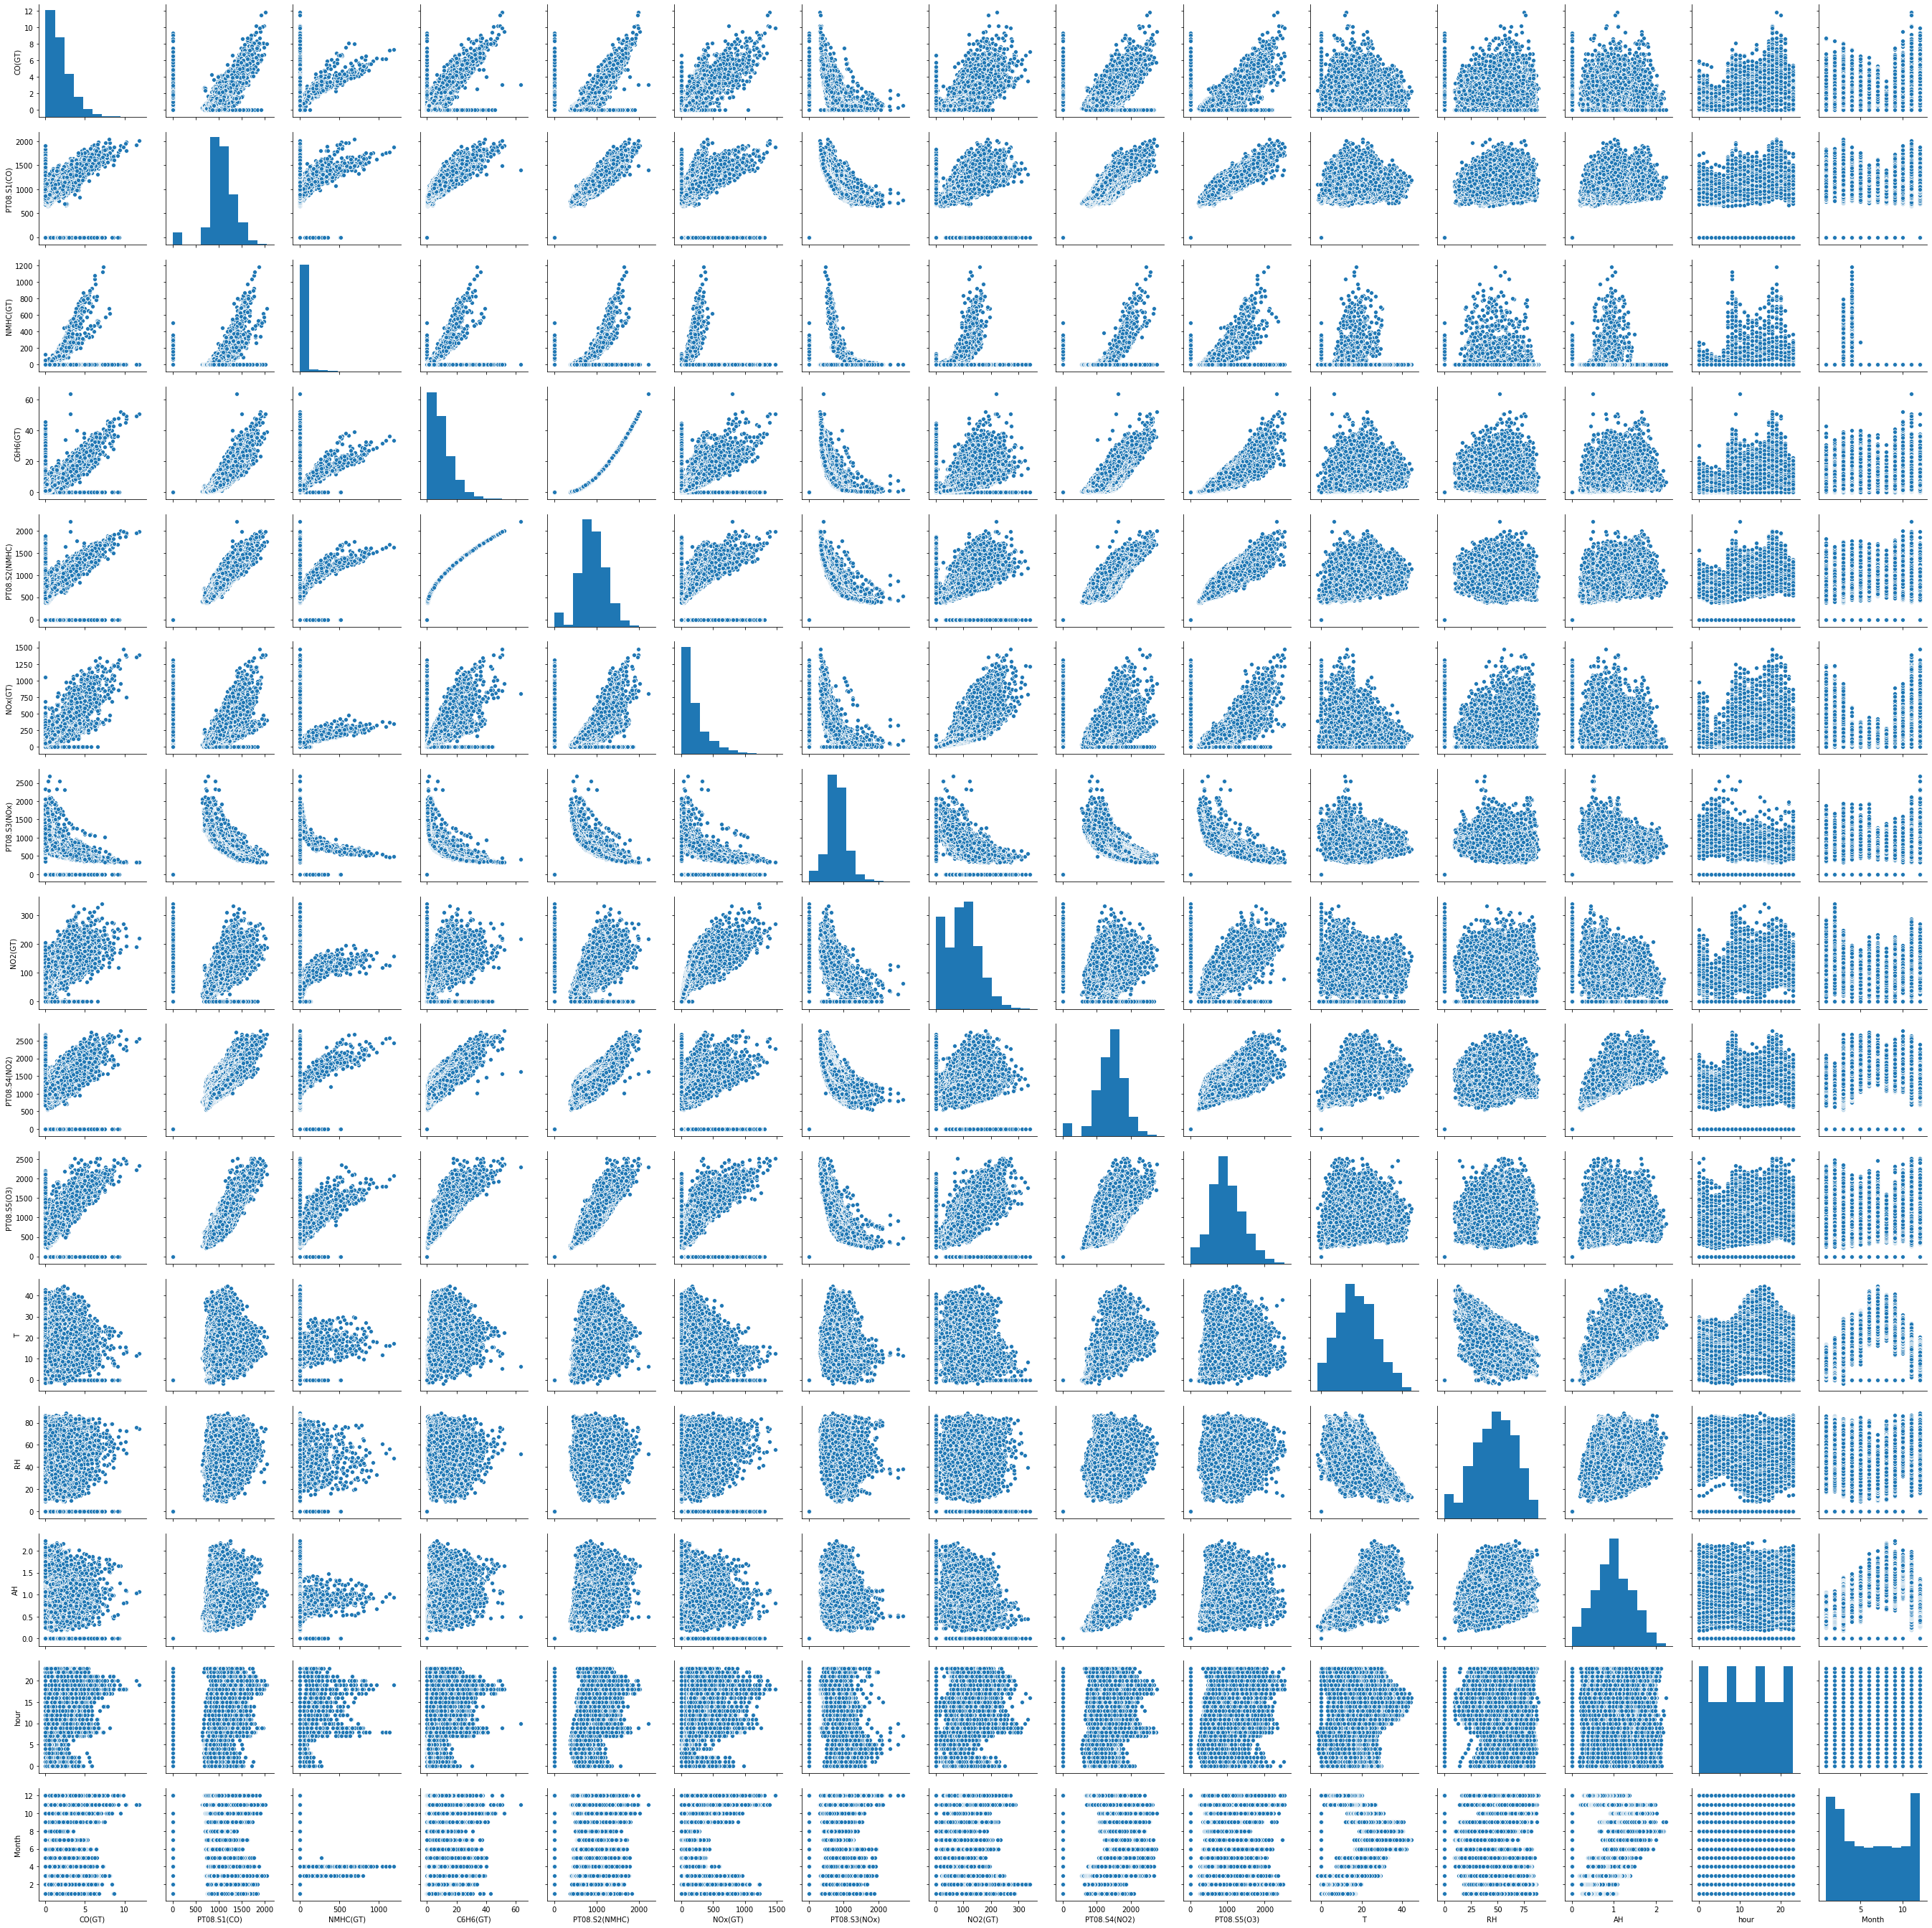

In [211]:
sns.pairplot(air_data)

In [212]:
air_data.corr()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.442767  0.249731  0.670762       0.533023   
PT08.S1(CO)    0.442767     1.000000  0.213243  0.786096       0.922093   
NMHC(GT)       0.249731     0.213243  1.000000  0.198318       0.170042   
C6H6(GT)       0.670762     0.786096  0.198318  1.000000       0.926235   
PT08.S2(NMHC)  0.533023     0.922093  0.170042  0.926235       1.000000   
NOx(GT)        0.811432     0.356239 -0.003625  0.543605       0.418980   
PT08.S3(NOx)  -0.513061    -0.075529 -0.033376 -0.457753      -0.240717   
NO2(GT)        0.723047     0.284407  0.099473  0.402426       0.333930   
PT08.S4(NO2)   0.282070     0.823523  0.196681  0.734013       0.855787   
PT08.S5(O3)    0.586734     0.886878  0.155219  0.862711       0.903055   
T             -0.079149     0.300418 -0.025189  0.275951       0.400110   
RH            -0.018417     0.417512 -0.020126  0.074815       0.215384   
AH            -0.092964     0.403139 -0.071579  0.261066       0.393544   
hour           0.311806     0.217202  0.073981  0.321919       0.304906   
Month          0.008668    -0.009916 -0.181407  0.127132       0.116611   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
CO(GT)         0.811432     -0.513061  0.723047      0.282070     0.586734   
PT08.S1(CO)    0.356239     -0.075529  0.284407      0.823523     0.886878   
NMHC(GT)      -0.003625     -0.033376  0.099473      0.196681     0.155219   
C6H6(GT)       0.543605     -0.457753  0.402426      0.734013     0.862711   
PT08.S2(NMHC)  0.418980     -0.240717  0.333930      0.855787     0.903055   
NOx(GT)        1.000000     -0.514602  0.795861      0.068386     0.553192   
PT08.S3(NOx)  -0.514602      1.000000 -0.440186     -0.002033    -0.352335   
NO2(GT)        0.795861     -0.440186  1.000000      0.010010     0.438964   
PT08.S4(NO2)   0.068386     -0.002033  0.010010      1.000000     0.694737   
PT08.S5(O3)    0.553192     -0.352335  0.438964      0.694737     1.000000   
T             -0.268669      0.092459 -0.195788      0.641915     0.149396   
RH             0.079339      0.223635 -0.125206      0.291912     0.319012   
AH            -0.210656      0.068527 -0.324359      0.719604     0.259576   
hour           0.229671     -0.273785  0.313225      0.157803     0.207743   
Month          0.035087     -0.036713 -0.246633      0.147747     0.053843   

                      T        RH        AH      hour     Month  
CO(GT)        -0.079149 -0.018417 -0.092964  0.311806  0.008668  
PT08.S1(CO)    0.300418  0.417512  0.403139  0.217202 -0.009916  
NMHC(GT)      -0.025189 -0.020126 -0.071579  0.073981 -0.181407  
C6H6(GT)       0.275951  0.074815  0.261066  0.321919  0.127132  
PT08.S2(NMHC)  0.400110  0.215384  0.393544  0.304906  0.116611  
NOx(GT)       -0.268669  0.079339 -0.210656  0.229671  0.035087  
PT08.S3(NOx)   0.092459  0.223635  0.068527 -0.273785 -0.036713  
NO2(GT)       -0.195788 -0.125206 -0.324359  0.313225 -0.246633  
PT08.S4(NO2)   0.641915  0.291912  0.719604  0.157803  0.147747  
PT08.S5(O3)    0.149396  0.319012  0.259576  0.207743  0.053843  
T              1.000000 -0.280593  0.713025  0.181985  0.263858  
RH            -0.280593  1.000000  0.350840 -0.259032  0.082211  
AH             0.713025  0.350840  1.000000 -0.022388  0.380990  
hour           0.181985 -0.259032 -0.022388  1.000000 -0.000102  
Month          0.263858  0.082211  0.380990 -0.000102  1.000000

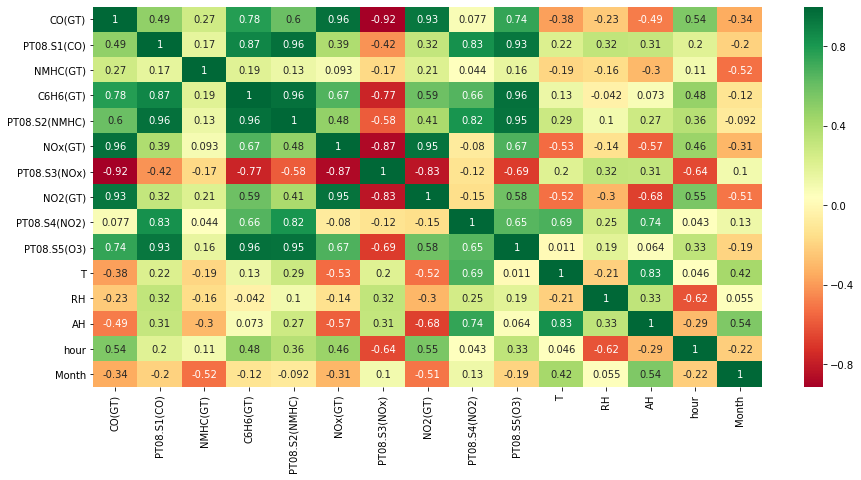

In [213]:
#Find the corelation between variables using heat map
corrmat = air_data.corr()
top_data_corr = corrmat.index
plt.figure(figsize = (15,7))
sns.heatmap(corrmat[top_data_corr].corr(),annot = True ,cmap='RdYlGn')

In [214]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  hour  Month  
0  13.6  48.9  0.7578    18      3  
1  13.3  47.7  0.7255    19      3  
2  11.9  54.0  0.7502    20      3  
3  11.0  60.0  0.7867    21      3  
4  11.2  59.6  0.7888    22      3

In [215]:
#Split the dataset using train test split 
from sklearn.model_selection import train_test_split

In [216]:
col_names=air_data.columns.tolist()[2:]
# dropping target columns
X=air_data[col_names].drop('RH',1)
Y = air_data.RH

In [217]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn import preprocessing  
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)

In [218]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,Y,test_size = 0.3, random_state = 42)

In [219]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(6549, 14) (6549,) (2808, 14) (2808,)


# Linear Regression

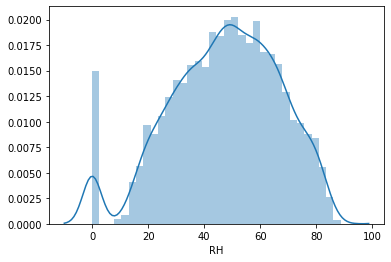

In [220]:
sns.distplot(Y)

In [221]:
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train,y_train)

In [222]:
y_predict = lr_model.predict(X_test)
print("Coefficient of determination of R2 on train set {}".format(lr_model.score(X_train,y_train)))
print("Coefficient of determination of R2 on test set {}".format(lr_model.score(X_test,y_test)))

Coefficient of determination of R2 on train set 0.9058904543702851
Coefficient of determination of R2 on test set 0.9060178584445352


In [223]:
rmse=np.sqrt(mean_squared_error(y_test,y_predict))    
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 5.952781741398779


In [224]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr_model,scaled_df,Y, cv = 5).mean()

In [225]:
print(score)

0.43484324674106467


# Model Evalution

In [226]:
lr_model.coef_

array([ -0.63455865,   7.16575067,  -0.72163881, -12.4230259 ,
         8.50663074,   2.47811429,   1.8767269 ,  -1.21360426,
         6.27046217,  -1.69250071, -21.89688868,  14.86956641,
        -0.96100356,   1.08419565])

In [227]:
lr_model.intercept_

47.30917287719912

In [228]:
coef_data = pd.DataFrame(lr_model.coef_,X.columns,columns=['coefficient'])
coef_data

coefficient
CO(GT)           -0.634559
PT08.S1(CO)       7.165751
NMHC(GT)         -0.721639
C6H6(GT)        -12.423026
PT08.S2(NMHC)     8.506631
NOx(GT)           2.478114
PT08.S3(NOx)      1.876727
NO2(GT)          -1.213604
PT08.S4(NO2)      6.270462
PT08.S5(O3)      -1.692501
T               -21.896889
AH               14.869566
hour             -0.961004
Month             1.084196

# Interpreting the coeficent

In [229]:
y_prediction = lr_model.predict(X_test)

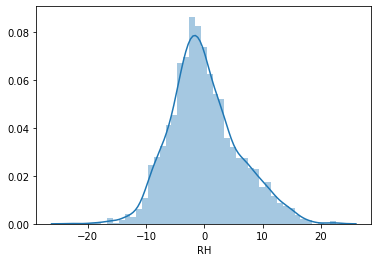

In [230]:
sns.distplot(y_test - y_prediction)

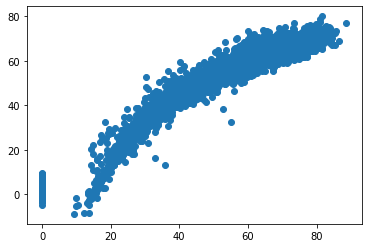

In [231]:
plt.scatter(y_test, y_prediction)

In [232]:
print("Mean Absolute Error(MAE) {}".format(mean_absolute_error(y_test,y_prediction)))
print("Mean Squared Error(MSE) {}".format(mean_squared_error(y_test,y_prediction)))
print("Root Mean Squared Error(RMSE) {}".format(np.sqrt(mean_squared_error(y_test,y_prediction))))

Mean Absolute Error(MAE) 4.641163175577648
Mean Squared Error(MSE) 35.43561046073067
Root Mean Squared Error(RMSE) 5.952781741398779


In [233]:
mse = cross_val_score(lr_model, scaled_df, Y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-178.11785820702227


# Ridge Regression

In [234]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {"alpha":[1e-10,1e-8,1e-6,1e-4,1e-2,1,2,4,6,8,10,15,20,25,30,35,40,45,50,55,100]}
ridge_reg_model = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg_model.fit(scaled_df, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1, 2, 4,
                                   6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [235]:
print(ridge_reg_model.best_estimator_)
print(ridge_reg_model.best_params_)
print(ridge_reg_model.best_score_)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 100}
-52.250076132794064


In [236]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Lasso Regression

In [237]:
lasso = Lasso()
parameters = {"alpha":[1e-10,1e-8,1e-6,1e-4,1e-2,1,2,4,6,8,10,15,20,25,30,35,40,45,50,55,100]}
lass_reg_model = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error',cv=5)
lass_reg_model.fit(scaled_df, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1, 2, 4,
                                   6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [238]:
print(lass_reg_model.best_estimator_)
print(lass_reg_model.best_params_)
print(lass_reg_model.best_score_)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.01}
-57.64160168180856


# Model Evaluation

In [239]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df, Y)
prediction = lass_reg_model.predict(X_test)

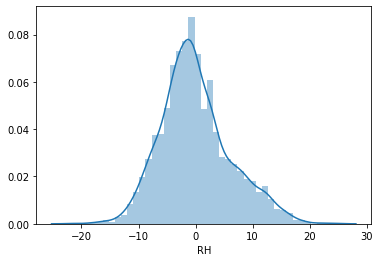

In [240]:
sns.distplot(y_test - prediction)

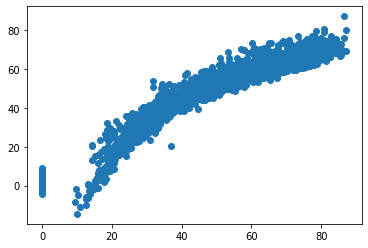

In [241]:

plt.scatter(y_test,prediction)

In [242]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
print("Mean Absolute Error {}".format(mae))
print("Mean Aquared Error {}".format(mse))
print("Roor Mean Squared Error {}".format(rmse))

Mean Absolute Error 4.75373501681098
Mean Aquared Error 37.642853521716006
Roor Mean Squared Error 6.135377211037314


## As we found Linear Regresson, Ridge and Lasso are giving RMSE is near to 7. So we need to find RMSE near to 1.

# Decision Tree Regressor

In [243]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df, Y,test_size = 0.2,random_state=1)

In [244]:
dtc = tree(criterion="mse")
dtc.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [245]:
print("R2 TRAINED DATA/Learned dataset  score....",dtc.score(X_train,y_train))

R2 TRAINED DATA/Learned dataset  score.... 1.0


In [246]:
print("R2 TESTED DATA/Learned dataset  score....",dtc.score(X_test,y_test))

R2 TESTED DATA/Learned dataset  score.... 0.9957728672191494


In [247]:
prediction = dtc.predict(X_test)

In [248]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
print("Mean Absolute Error {}".format(mae))
print("Mean Aquared Error {}".format(mse))
print("Roor Mean Squared Error {}".format(rmse))

Mean Absolute Error 0.8979166666666667
Mean Aquared Error 1.5901121794871793
Roor Mean Squared Error 1.260996502567386


# Decision Tree Regressor RMSE is 1.2483707330675

# Random Forest Regressor

In [249]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df, Y,test_size = 0.2,random_state=1)

In [250]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

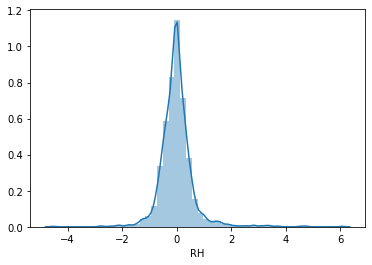

In [251]:
y_pred = rfr.predict(X_test)
sns.distplot(y_test-y_pred)

In [252]:
print("RFR TRAINED DATA SCORE>>>>>",rfr.score(X_train,y_train))
print("RFR TEST DATA SCORE>>>>>",rfr.score(X_test,y_test))

RFR TRAINED DATA SCORE>>>>> 0.9998478855914358
RFR TEST DATA SCORE>>>>> 0.9989390017384117


In [253]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(rfr,scaled_df, Y,cv=5).mean()
cross_score

0.9870960098598023

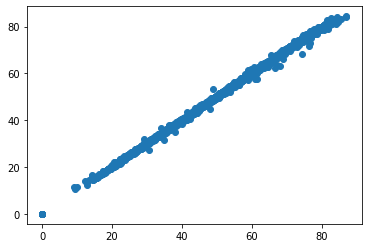

In [254]:
#Model Evaluation
plt.scatter(y_test,y_pred)

In [255]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error {}".format(mae))
print("Mean Aquared Error {}".format(mse))
print("Roor Mean Squared Error {}".format(rmse))

Mean Absolute Error 0.38810844017094087
Mean Aquared Error 0.39911361805555756
Roor Mean Squared Error 0.6317543969420059


## Random Forest RMSE is  0.6383273607205362

In [256]:
#Hypertuning Random Forest Regressor
# Hyperparameter Optimization

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [257]:
# Create the random grid
randomized_search_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [258]:
# Use the randomized_search_params to search for best hyperparameters
# First create the base model to tune
rfr_model = RandomForestRegressor()

In [259]:
random_search_cv = RandomizedSearchCV(estimator = rfr_model, param_distributions = randomized_search_params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [260]:
#random_search_cv.fit(X_train,y_train)

In [261]:
#random_search_cv.best_params_

In [262]:
#random_search_cv.best_score_

In [263]:
#y_pred = random_search_cv.predict(X_test)

In [264]:
#print('MAE:', mean_absolute_error(y_test, y_pred))
#print('MSE:', mean_squared_error(y_test, y_pred))
#print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

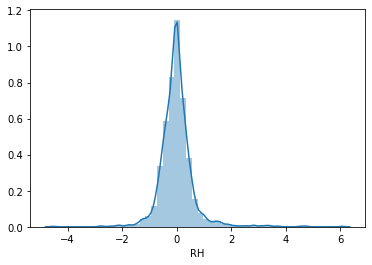

In [265]:
sns.distplot(y_test-y_pred)

# Conclusion:-

# Random Forest Regressor->  RMSE is 0.6383273607205362


# Random Forest Regressor is best model for AirQualityUCI